## Task - 02
## Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

## Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib

# Sample DataFrame representing customer purchase history
data = {
    'customer_id': [1, 2, 3, 4, 5],
    'annual_spending': [5000, 10000, 7000, 12000, 9000],
    'num_transactions': [50, 150, 70, 200, 130],
    'avg_transaction_value': [100, 67, 100, 60, 69],
    'loyalty_points': [200, 500, 300, 600, 400]
}

df = pd.DataFrame(data)


## Standardization

In [2]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['customer_id']))


## Elbow Method for Optimal Clusters

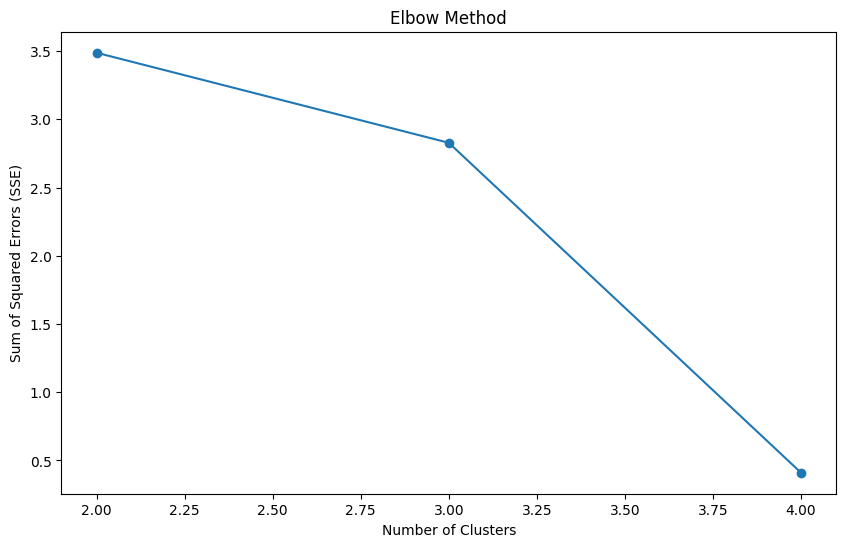

In [3]:
# Determining the optimal number of clusters using the Elbow Method
sse = []
range_n_clusters = range(1, len(df))  # Ensure clusters are less than number of samples

for n_clusters in range_n_clusters:
    if n_clusters == 1:
        continue  # KMeans with 1 cluster doesn't make sense for SSE calculation
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(df)), sse, marker='o')  # Adjusting the range to start from 2
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


## Optimal Cluster Plotting

In [4]:
# Based on the elbow method and silhouette score, choosing optimal clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)


##  K-Means Clustering

In [5]:
# Implementing K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)


## Cluster Assignment

In [6]:
# Assigning clusters to the original data
df['cluster'] = kmeans.labels_


## Saving the K-Means Model

In [7]:
# Saving the K-means model
model_path = r'C:\Users\Admin\Desktop\JN\kmeans_model.pkl'
joblib.dump(kmeans, model_path)


['C:\\Users\\Admin\\Desktop\\JN\\kmeans_model.pkl']

## Cluster Profiling

In [8]:
# Cluster Profiling
cluster_profile = df.groupby('cluster').mean()

print("Cluster Profile:\n", cluster_profile)


Cluster Profile:
          customer_id  annual_spending  num_transactions  \
cluster                                                   
0           3.666667     10333.333333             160.0   
1           3.000000      7000.000000              70.0   
2           1.000000      5000.000000              50.0   

         avg_transaction_value  loyalty_points  
cluster                                         
0                    65.333333           500.0  
1                   100.000000           300.0  
2                   100.000000           200.0  


## Detailed Visualization (Annual Spending vs Number of Transactions)

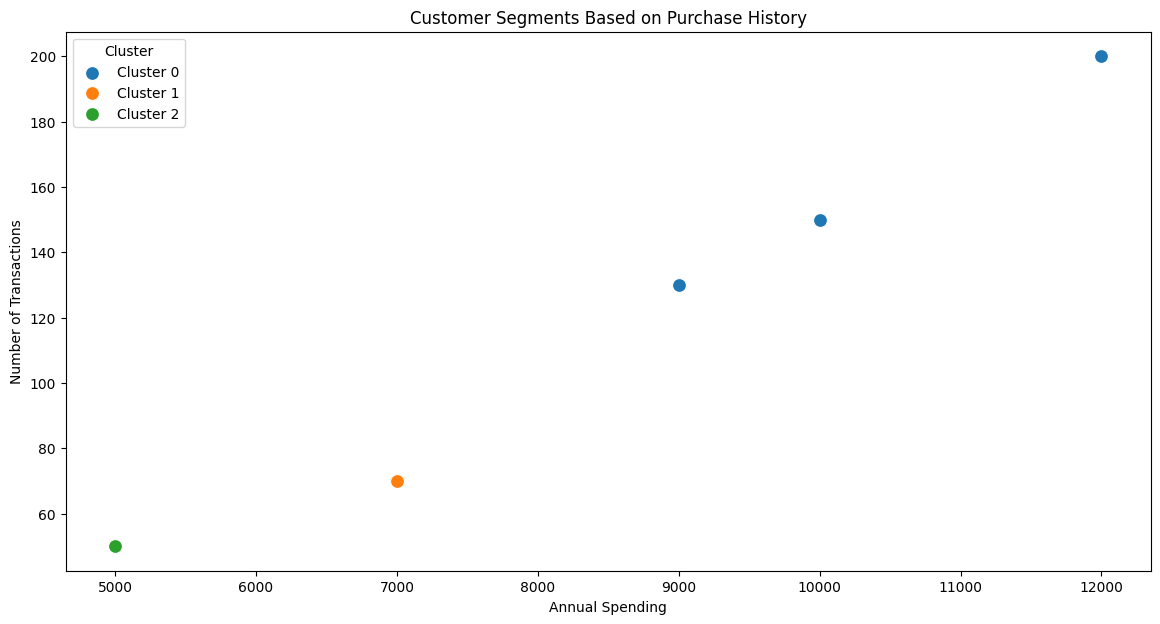

In [9]:
# Detailed Visualization
plt.figure(figsize=(14, 7))
for i in range(optimal_clusters):
    sns.scatterplot(data=df[df['cluster'] == i], x='annual_spending', y='num_transactions', label=f'Cluster {i}', s=100)
plt.title('Customer Segments Based on Purchase History')
plt.xlabel('Annual Spending')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.show()


## Visualization of Additional Feature Pairs

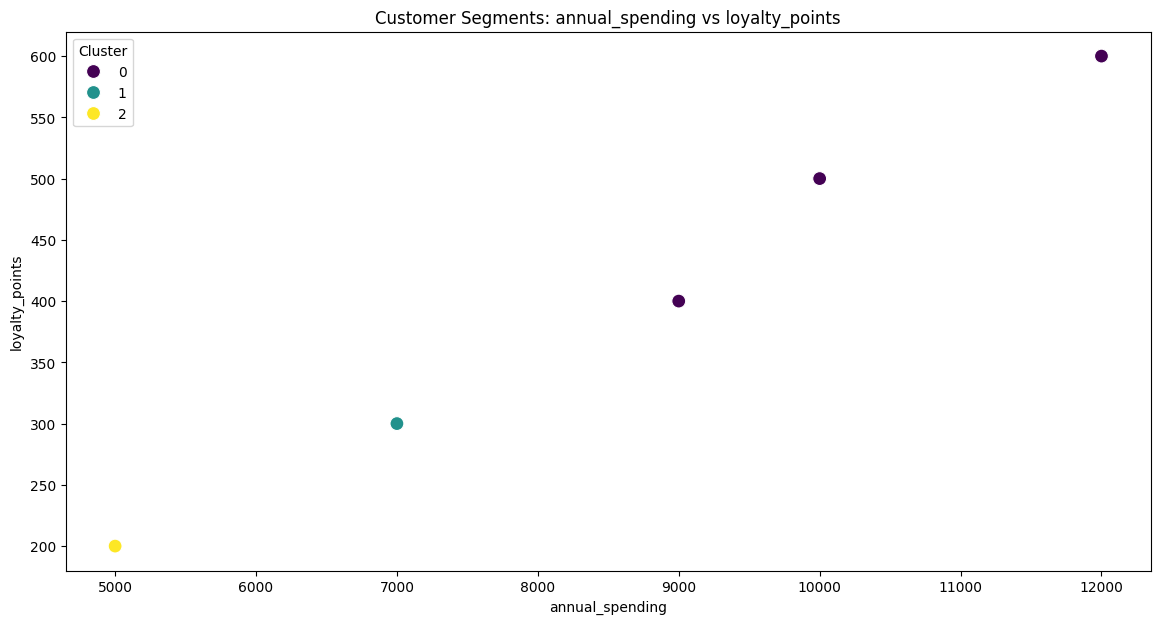

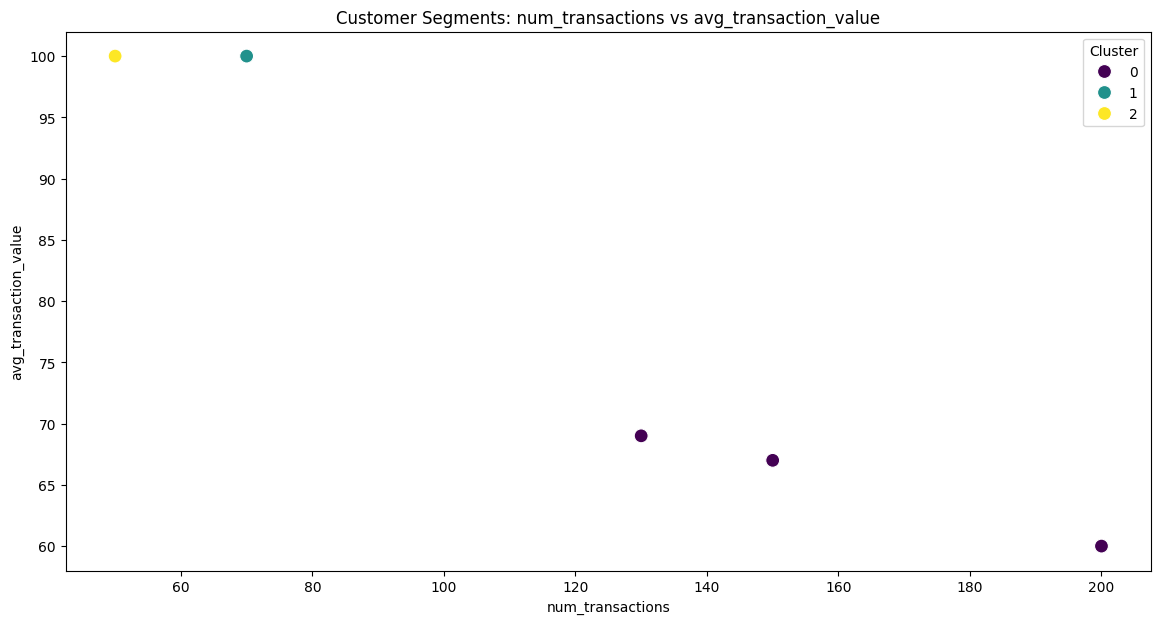

In [10]:
# Visualizing other pairs of features
feature_pairs = [('annual_spending', 'loyalty_points'), ('num_transactions', 'avg_transaction_value')]

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=df, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100)
    plt.title(f'Customer Segments: {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title='Cluster')
    plt.show()


## Saving Clustered Data to CSV

In [11]:
# Define the file path for saving the DataFrame with clusters
file_path = r'C:\Users\Admin\Desktop\JN\customer_clusters.csv'

# Save the DataFrame with clusters to a CSV file
df.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")


File saved at: C:\Users\Admin\Desktop\JN\customer_clusters.csv


## Model Inference (Predicting clusters for new data)

In [12]:
# Example of using the saved model to predict clusters for new data
new_data = np.array([[8000, 100, 80, 350]])
new_data_scaled = scaler.transform(new_data)
new_clusters = kmeans.predict(new_data_scaled)

print(f"Predicted cluster for new data: {new_clusters[0]}")


Predicted cluster for new data: 1


## Inverse Transform to Original Scale

In [13]:
# Inverse transform to get back to original scale
original_data = scaler.inverse_transform(new_data_scaled)
print("Original Data:", original_data)


Original Data: [[8000.  100.   80.  350.]]


## Loading the Saved Model

In [14]:
# Loading the saved K-means model
loaded_kmeans = joblib.load(model_path)

# Using the loaded model for predictions
loaded_clusters = loaded_kmeans.predict(new_data_scaled)

print(f"Predicted cluster using loaded model: {loaded_clusters[0]}")
print(f"Model loaded from: {model_path}")


Predicted cluster using loaded model: 1
Model loaded from: C:\Users\Admin\Desktop\JN\kmeans_model.pkl


## Cluster Centers Visualization

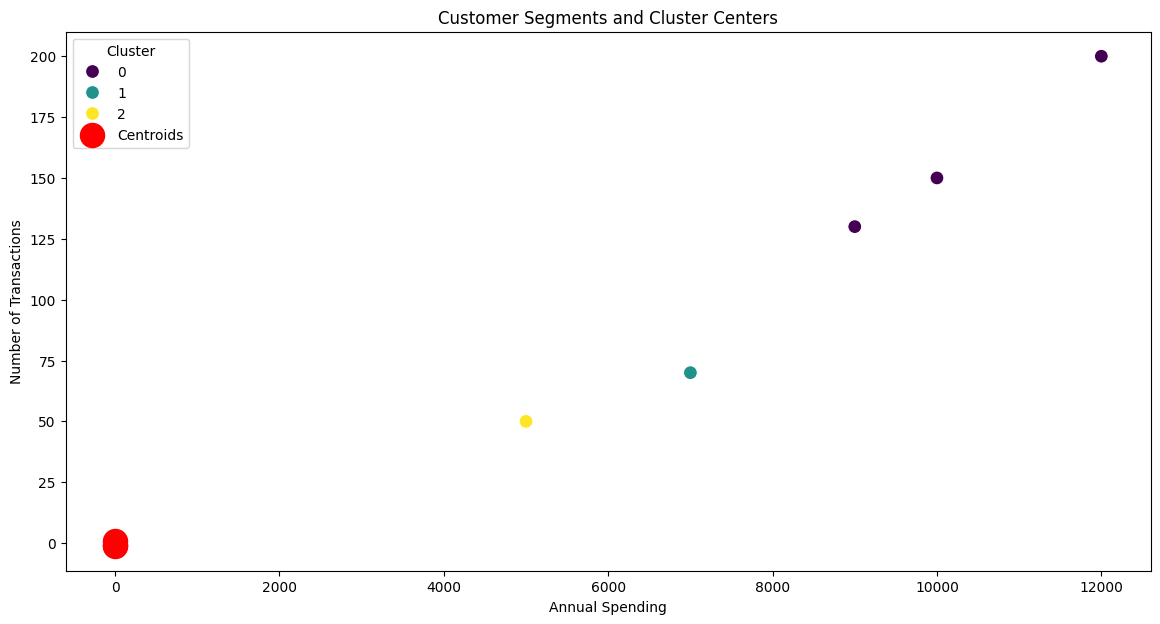

In [15]:
# Plotting the cluster centers
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='annual_spending', y='num_transactions', hue='cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segments and Cluster Centers')
plt.xlabel('Annual Spending')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.show()


##  Pairplot Visualization for Clusters

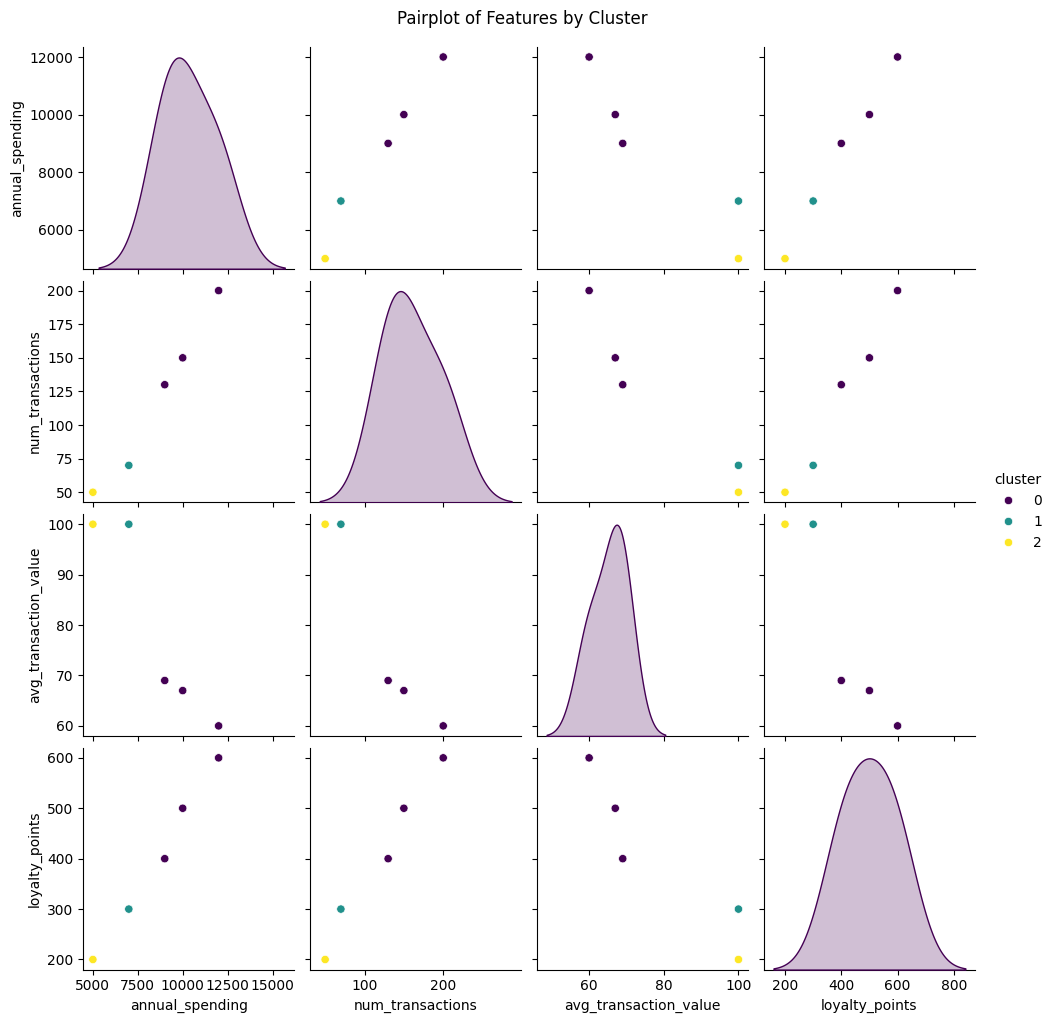

In [16]:
# Pairplot Visualization
sns.pairplot(df.drop(columns=['customer_id']), hue='cluster', palette='viridis')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()


## Feature Importance in Clustering

<Figure size 1000x600 with 0 Axes>

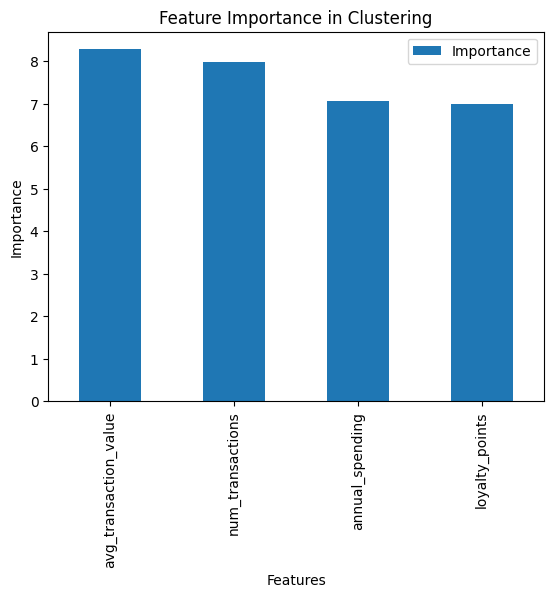

In [17]:
# Analyzing the importance of features in determining clusters
from sklearn.inspection import permutation_importance

results = permutation_importance(kmeans, scaled_data, kmeans.labels_, n_repeats=10, random_state=42, n_jobs=2)
importance_df = pd.DataFrame(results.importances_mean, index=df.columns[1:-1], columns=["Importance"])

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
importance_df.sort_values(by="Importance", ascending=False).plot(kind='bar')
plt.title('Feature Importance in Clustering')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## Heatmap of Feature Correlations

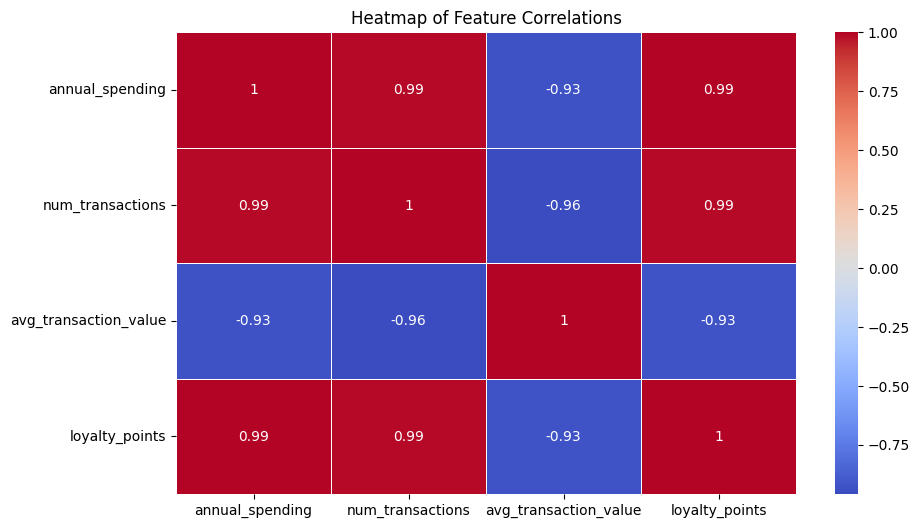

In [18]:
# Correlation matrix
corr_matrix = df.drop(columns=['customer_id', 'cluster']).corr()

# Plotting the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


## Distribution of Features per Cluster

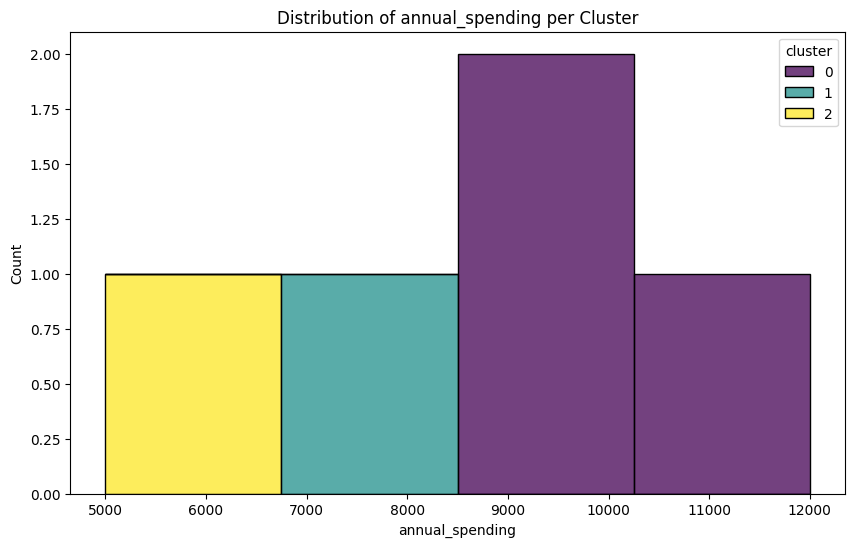

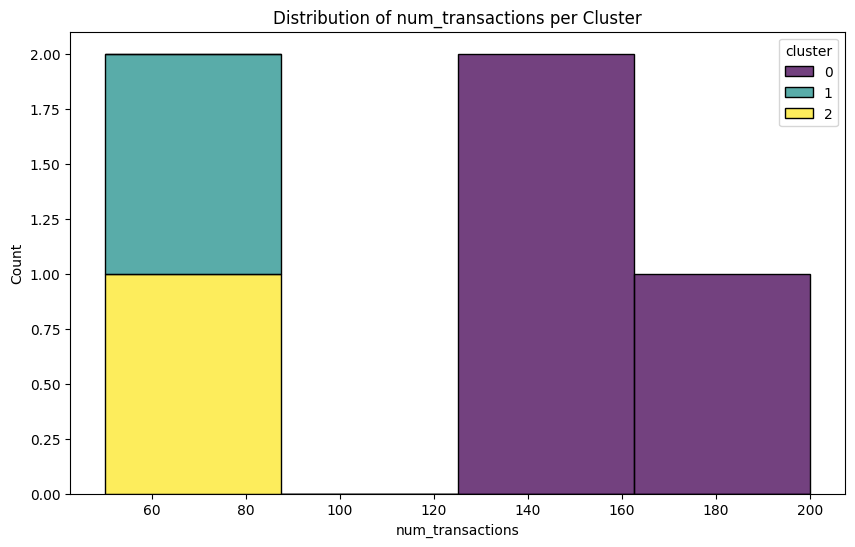

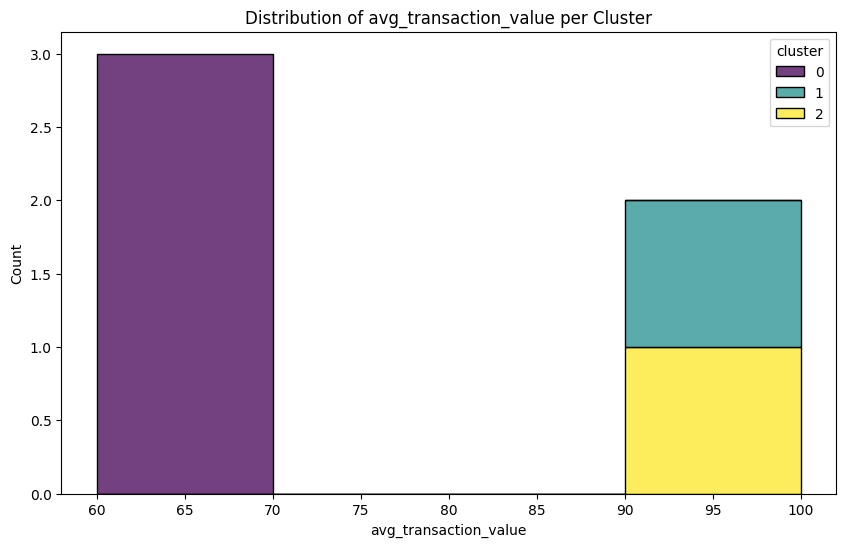

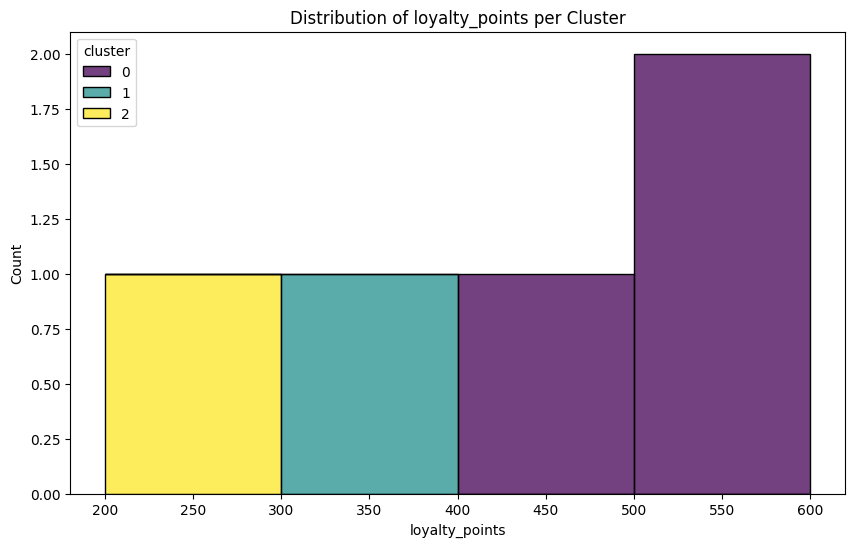

In [20]:
# Distribution of Features within Clusters
features = df.columns[1:-1]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='cluster', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {feature} per Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
